#### key terms
Feature representation  
Data instances/samples (X)
Target value (y)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
fruits=pd.read_table('fruit_data_with_colors.txt')

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruits_dict=dict(zip(fruits.fruit_label,fruits.fruit_name))

In [8]:
from sklearn.model_selection import train_test_split

In [22]:
X=fruits.iloc[:,3:]
y=fruits.iloc[:,0]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
knn.score(X_test,y_test)

0.53333333333333333

In [28]:
knn.fit(X_train_s,y_train)
knn.score(X_test_s,y_test)

1.0

In [30]:
from sklearn.datasets import make_regression,make_classification,make_blobs

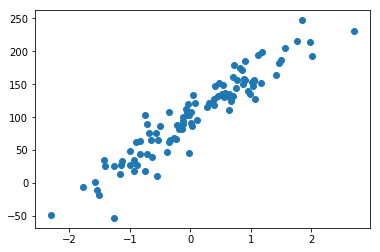

In [47]:
X_R1,y_R1=make_regression(n_samples=100,n_features=1,n_informative=1,bias=100,noise=20)

plt.scatter(X_R1,y_R1)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knnreg=KNeighborsRegressor(n_neighbors=5)
knnreg.fit(X_R1,y_R1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [51]:
y_R1_p=knnreg.predict(X_R1)

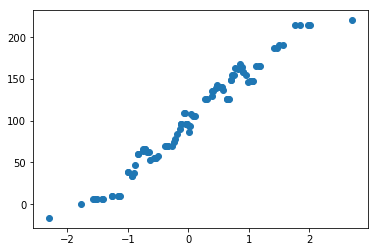

In [52]:
plt.scatter(X_R1,y_R1_p)

In [53]:
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [54]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression().fit(X_R1,y_R1)

In [55]:
linreg.coef_

array([ 61.93108045])

In [56]:
linreg.intercept_

98.190680742308004

In [57]:
linreg.score(X_R1,y_R1)

0.89256377133095344

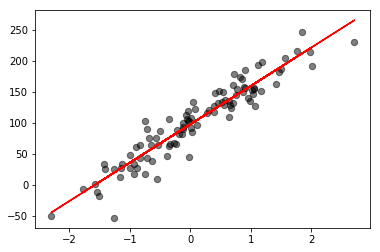

In [59]:
plt.scatter(X_R1,y_R1,marker='o',s=40,c='k',alpha=0.5)
plt.plot(X_R1,X_R1*linreg.coef_+linreg.intercept_,'r-')

In [62]:
X,y=make_regression(n_features=3,n_informative=3,bias=40,noise=40)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [65]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha = 20).fit(X_train,y_train)
ridge.score(X_test,y_test),ridge.score(X_train,y_train)

(0.8400619075377096, 0.84492023098219804)

In [66]:
ridge.alpha

20

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

In [68]:
scalar=MinMaxScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)
lasso=Lasso().fit(X_train_s,y_train)
lasso.score(X_test_s,y_test)

0.87997735966672064

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [74]:
X_train_p=poly.fit_transform(X_train)

In [76]:
X_train_p.shape

(75, 10)

In [77]:
X_train.shape

(75, 3)

In [78]:
poly2=PolynomialFeatures(degree=2)

In [79]:
X_train_p2=poly2.fit(X_train)

In [82]:
fruits=pd.read_table('fruit_data_with_colors.txt')

In [83]:
X=fruits.iloc[:,3:]
y=fruits.iloc[:,0]

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [86]:
from sklearn.linear_model import LogisticRegression
scaler=MinMaxScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [87]:
logreg=LogisticRegression(C=100).fit(X_train_s,y_train)
logreg.score(X_test_s,y_test)

0.66666666666666663

In [88]:
logreg2=LogisticRegression(C=100).fit(X_train,y_train)
logreg2.score(X_test,y_test)

0.66666666666666663

In [91]:
from sklearn.svm import SVC

In [96]:
svc=SVC(kernel='rbf',C=40).fit(X_train,y_train)
svc.score(X_test,y_test)

0.73333333333333328

In [99]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5).fit(X,y)
cross_val_score(knn,X,y)

array([ 0.54545455,  0.57894737,  0.5       ])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
clf.score(X_test,y_test)

0.94736842105263153

In [6]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
clf.max_features_

4

In [11]:
clf.feature_importances_

array([ 0.        ,  0.        ,  0.39314165,  0.60685835])

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']